This notebook will be dedicated to training and testing several ML models

In [1]:
from src import data_utils, preprocessing
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'src'

Only run the cell below by removing the # symbol if you haven't downloaded the zones data

In [2]:
# run this cell to download the required data files containing the trip and zones information

# data_utils.download_zones_data('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip')

In [2]:
# first we get our cleaned data set
df_og = data_utils.clean_trip_data('yellow_tripdata_2022-05.parquet')

In [4]:
df_og.head(3).T

,0,1,2
PULocationID,246,238,163
DOLocationID,151,74,260
fare_amount,17.0,11.0,15.5
improvement_surcharge,0.3,0.3,0.3
congestion_surcharge,2.5,2.5,2.5
airport_fee,0.0,0.0,0.0
travel_time,1122.0,829.0,922.0
time_of_day,night,night,night
day,1,1,1
month,5,5,5


In [3]:
# now we get our X, and ys
X, y_travel_time, y_fare_amount = data_utils.get_feature_target(df_og)

In [4]:
# and we then get our training and testing sets
# we are going to get two sets of y labels, one for travel_time and another for fare_amount
X_train, X_test, y_train_travel_time, y_test_travel_time, y_train_fare_amount, y_test_fare_amount = data_utils.get_train_test_sets(X, y_travel_time, y_fare_amount)

In [7]:
X_train.shape

(2601035, 10)

In [5]:
# we can further split the training set into training and validation
X_train, X_val, y_train_travel_time, y_val_travel_time, y_train_fare_amount, y_val_fare_amount = data_utils.get_train_test_sets(X_train, y_train_travel_time, y_train_fare_amount)

In [9]:
X_train.shape

(2080828, 10)

In [6]:
# now using the training, validation, and testing sets we can preprocess our data
X_train, X_val, X_test = preprocessing.preprocess_data(X_train, X_val, X_test)

Input train data shape:  (2080828, 10)
Input val data shape:  (520207, 10)
Input test data shape:  (650259, 10) 



In [11]:
X_train.shape

(2080828, 12)

In [7]:
column_names_order = ['PULocationID','DOLocationID','improvement_surcharge','congestion_surcharge','airport_fee','day','month','is_weekend','distance_between_zones','morning','afternoon','night']

**Initial Results with no finetuning**

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [14]:
# initial run without choosing any new hyperparameters
fare_amount_rf = RandomForestRegressor()

First we will start with RandomForest to predict fare amount

In [15]:
# our initial approach with no fine tuning
fare_amount_rf.fit(X_train,y_train_fare_amount)

RandomForestRegressor()

In [16]:
preds_fare = fare_amount_rf.predict(X_val)

In [18]:
# measure our results
r2_fare = r2_score(y_val_fare_amount, preds_fare)
mae = mean_absolute_error(y_val_fare_amount, preds_fare)
rmse = root_mean_squared_error(y_val_fare_amount, preds_fare)
# agregar r2
print(f'R2 score: {r2_fare}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.9000632591856829
Mean Absolute Error: 2.0124518623180827
Root Mean Squared Error: 3.9154143668822354


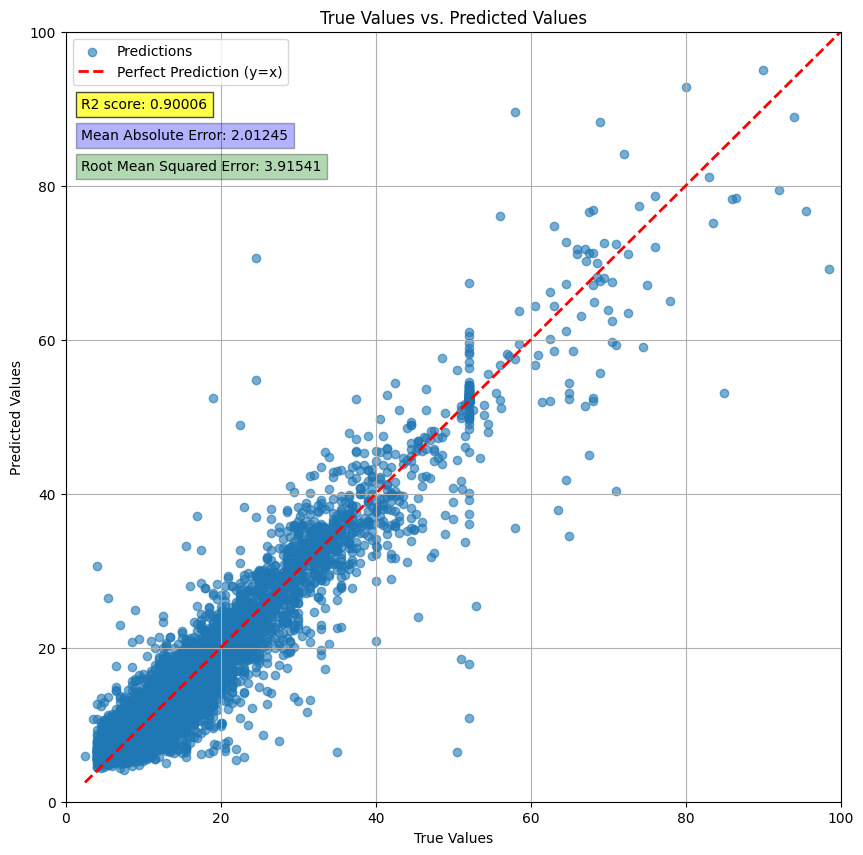

In [ ]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_val_fare_amount[:10000], preds_fare[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,100])
plt.ylim([0,100])
#plotting perfect line
min_val = min(np.min(y_val_fare_amount), np.min(preds_fare))
max_val = max(np.max(y_val_fare_amount), np.max(preds_fare))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.text(2,90,f'R2 score: {r2_fare:.5f}',bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(2,86,f'Mean Absolute Error: {mae:.5f}',bbox=dict(facecolor='blue', alpha=0.3))
plt.text(2,82,f'Root Mean Squared Error: {rmse:.5f}',bbox=dict(facecolor='green', alpha=0.3))
plt.show()

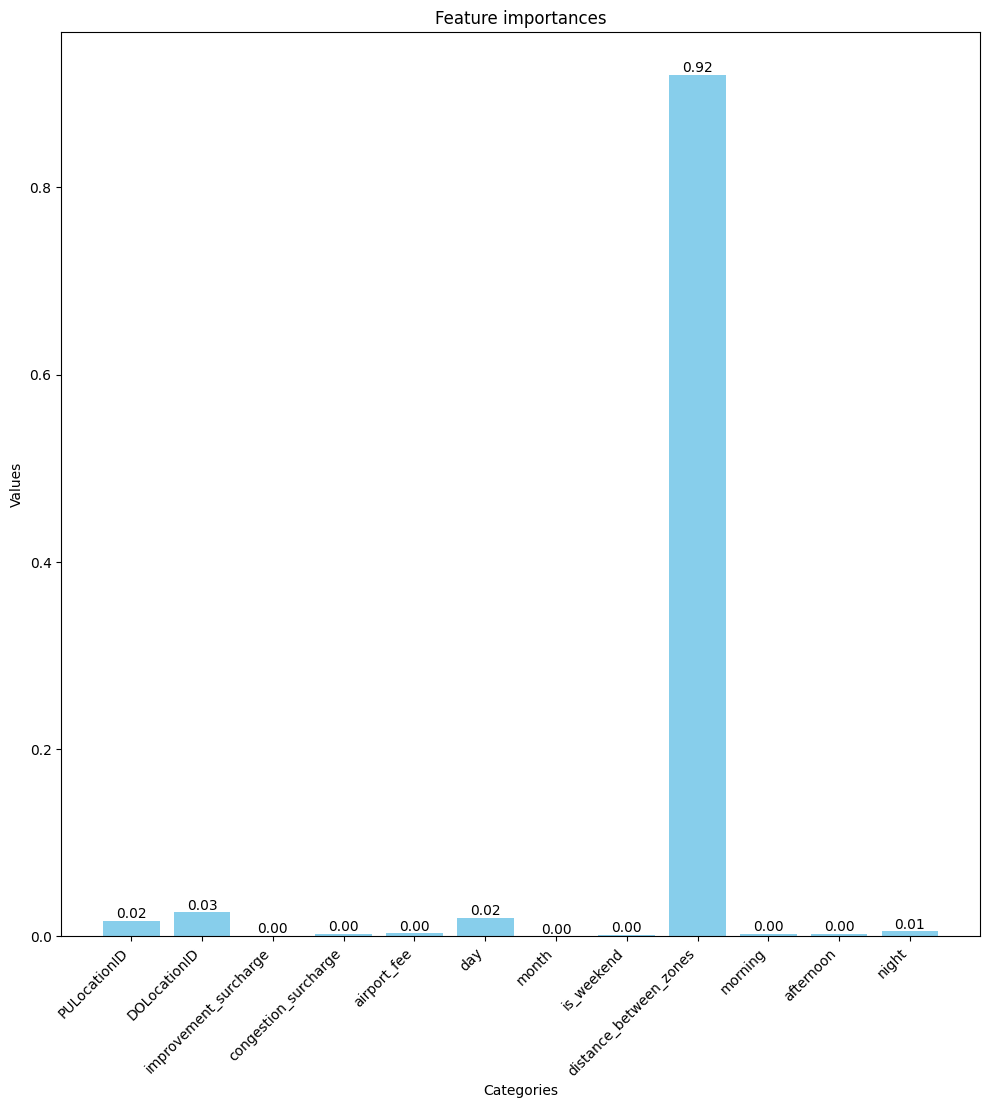

In [19]:
# Feature importances when predicting the fare amount
# bar chart
plt.figure(figsize=(10,10))
fare_bars = plt.bar(column_names_order,fare_amount_rf.feature_importances_,color='skyblue')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Feature importances")
# so everything fits and is readable
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
# to add values on top of each bar
for bar in fare_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, # x position (center of bar)
                yval,                             # y position (top of bar)
                f'{yval:.2f}',                    # Text label (format value)
                va='bottom',                      # Vertical alignment (above bar)
                ha='center') 


plt.show()

Now to predict the travel time

In [20]:
# initial run, no funetuning
travel_time_rf = RandomForestRegressor()

In [21]:
travel_time_rf.fit(X_train, y_train_travel_time)

RandomForestRegressor()

In [22]:
preds_tt = travel_time_rf.predict(X_val)

In [24]:
# measure our results
r2_tt = r2_score(y_val_travel_time, preds_tt)
mae = mean_absolute_error(y_val_travel_time, preds_tt)
rmse = root_mean_squared_error(y_val_travel_time, preds_tt)
# agregar r2
print(f'R2 score: {r2_tt}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.7763159118335524
Mean Absolute Error: 236.61321538987121
Root Mean Squared Error: 376.89131920835604


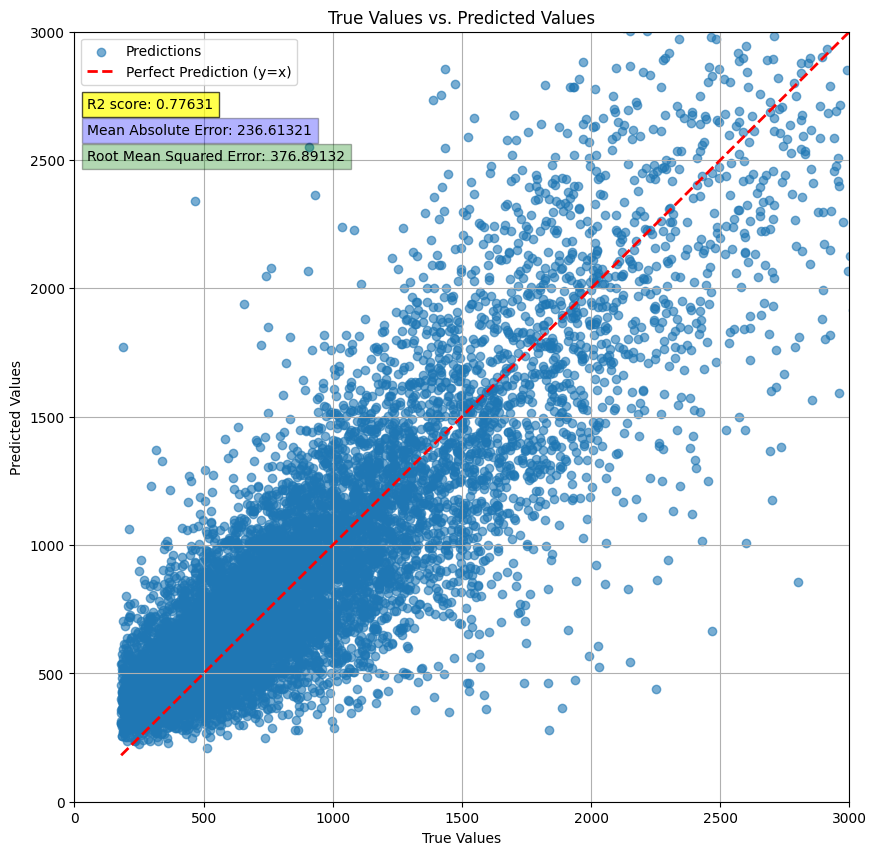

In [ ]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_val_travel_time[:10000], preds_tt[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,3000])
plt.ylim([0,3000])
#plotting perfect line
min_val = min(np.min(y_val_travel_time), np.min(preds_tt))
max_val = max(np.max(y_val_travel_time), np.max(preds_tt))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.text(50,2700,f'R2 score: {r2_tt:.5f}',bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(50,2600,f'Mean Absolute Error: {mae:.5f}',bbox=dict(facecolor='blue', alpha=0.3))
plt.text(50,2500,f'Root Mean Squared Error: {rmse:.5f}',bbox=dict(facecolor='green', alpha=0.3))
plt.show()

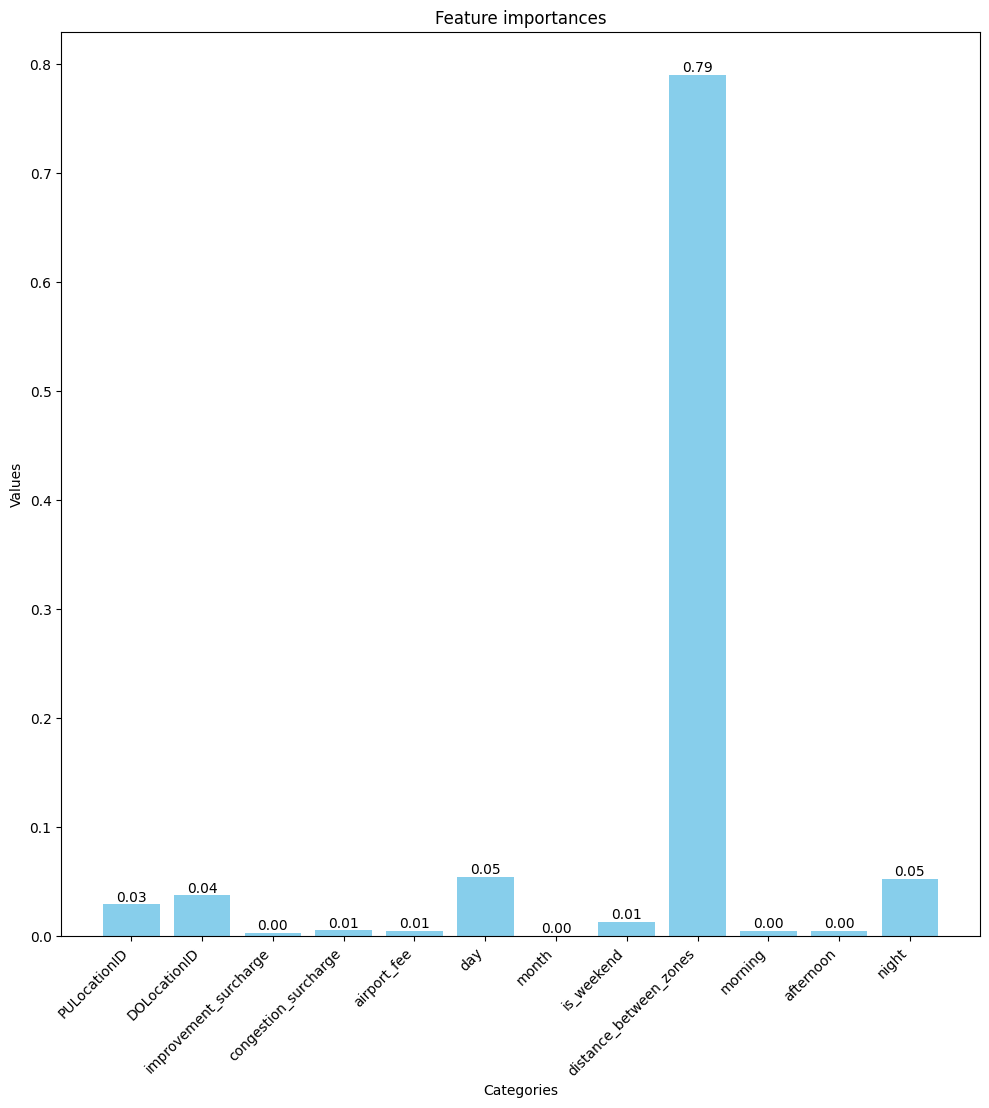

In [25]:
# Now showing the feature importances
# set size
plt.figure(figsize=(10,10))
# get bars to plot (names,values)
travel_bars = plt.bar(column_names_order,travel_time_rf.feature_importances_,color='skyblue')
# set some general parameters
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Feature importances")
# tight layout so everything fits
plt.tight_layout()
# rotate the name of the columns so we are able to read them more easily
plt.xticks(rotation=45, ha='right')
# for each bar, we get the height and add the value on top of it
for bar in travel_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, # x position (center of bar)
                yval,                             # y position (top of bar)
                f'{yval:.2f}',                    # Text label (format value)
                va='bottom',                      # Vertical alignment (above bar)
                ha='center') 


plt.show()

**Now we start finetuning our RandomForest models**

Since our training dataset is fairly large (around 2M rows), it would not be time efficient to try to do a RandomizedSearch using the complete dataset, since this would takeup too much time.

Instead, we will first create a subsample of this training dataset that is much smaller, and use that to perform RandomizedSearch with a wide range of parameters to more efficiently check for the best ranges.
Once we have narrowed down our ranges a bit, we can then use those new updated ranges to perform RandomizedSearch on the complete training dataset that contains 2M rows

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
y_train_fa = y_train_fare_amount.reset_index(drop=True)
y_val_fa = y_val_fare_amount.reset_index(drop=True)

In [55]:
# create a much smaller subsample from our X_train dataset
n_samples = 80000
rand_idx = np.random.choice(X_train.shape[0], size=n_samples, replace=False)

X_subsample_train = X_train[rand_idx]
y_subsample_train = y_train_fa[rand_idx]
print(X_subsample_train.shape)
print(y_subsample_train.shape)

(80000, 12)
(80000,)


In [56]:
# we also create one for our validation X_val dataset
n_samples = 20000
rand_idx = np.random.choice(X_val.shape[0], size=n_samples, replace=False)

X_subsample_val = X_val[rand_idx]
y_subsample_val = y_val_fa[rand_idx]
print(X_subsample_val.shape)
print(y_subsample_val.shape)

(20000, 12)
(20000,)


In [57]:
fare_amount_rf = RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
# we will choose from the following parameters to perform our cross validation search
rf_params = {'n_estimators':[int(x) for x in np.linspace(start=900,stop=1000,num=10)], # 100,200,300...1000
             'max_features':['sqrt','log2',0.5,0.75,1.0],
             'max_depth':[int(x) for x in np.linspace(start=50,stop=100,num=5)], # 10,20...50
             'min_samples_split':[25,50,100,150],
             'min_samples_leaf':[5,10,20,50,100],
             }

In [59]:
n_iterations = 20

In [60]:
clf_fare_amount = RandomizedSearchCV(estimator=fare_amount_rf,
                                     param_distributions=rf_params,
                                     n_iter=n_iterations,
                                     cv=5,
                                     scoring='r2',
                                     verbose=3,
                                     n_jobs=-1,
                                     random_state=42)

In [61]:
clf_fare_amount.fit(X_subsample_train,y_subsample_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END max_depth=87, max_features=0.75, min_samples_leaf=100, min_samples_split=50, n_estimators=922;, score=0.914 total time= 1.1min
[CV 1/5] END max_depth=87, max_features=0.75, min_samples_leaf=100, min_samples_split=50, n_estimators=922;, score=0.904 total time= 1.1min
[CV 2/5] END max_depth=87, max_features=0.75, min_samples_leaf=100, min_samples_split=50, n_estimators=922;, score=0.910 total time= 1.1min
[CV 1/5] END max_depth=50, max_features=1.0, min_samples_leaf=10, min_samples_split=100, n_estimators=900;, score=0.912 total time= 1.7min
[CV 2/5] END max_depth=50, max_features=1.0, min_samples_leaf=10, min_samples_split=100, n_estimators=900;, score=0.916 total time= 1.7min
[CV 4/5] END max_depth=50, max_features=1.0, min_samples_leaf=10, min_samples_split=100, n_estimators=900;, score=0.915 total time= 1.7min
[CV 3/5] END max_depth=50, max_features=1.0, min_samples_leaf=10, min_samples_split=100, n_estimators

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [50, 62, 75, 87, 100],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         0.75, 1.0],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [25, 50, 100, 150],
                                        'n_estimators': [900, 911, 922, 933,
                                                         944, 955, 966, 977,
                                                         988, 1000]},
                   random_state=42, scoring='r2', verbose=3)

In [65]:
clf_pred_fa = clf_fare_amount.predict(X_subsample_val)

In [103]:
# measure our results
r2_fare_opt = r2_score(y_subsample_val, clf_pred_fa)
mae = mean_absolute_error(y_subsample_val, clf_pred_fa)
rmse = root_mean_squared_error(y_subsample_val, clf_pred_fa)
# agregar r2
print(f'R2 score: {r2_fare_opt}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.9134274817914873
Mean Absolute Error: 2.1121036613945243
Root Mean Squared Error: 3.605596441849929


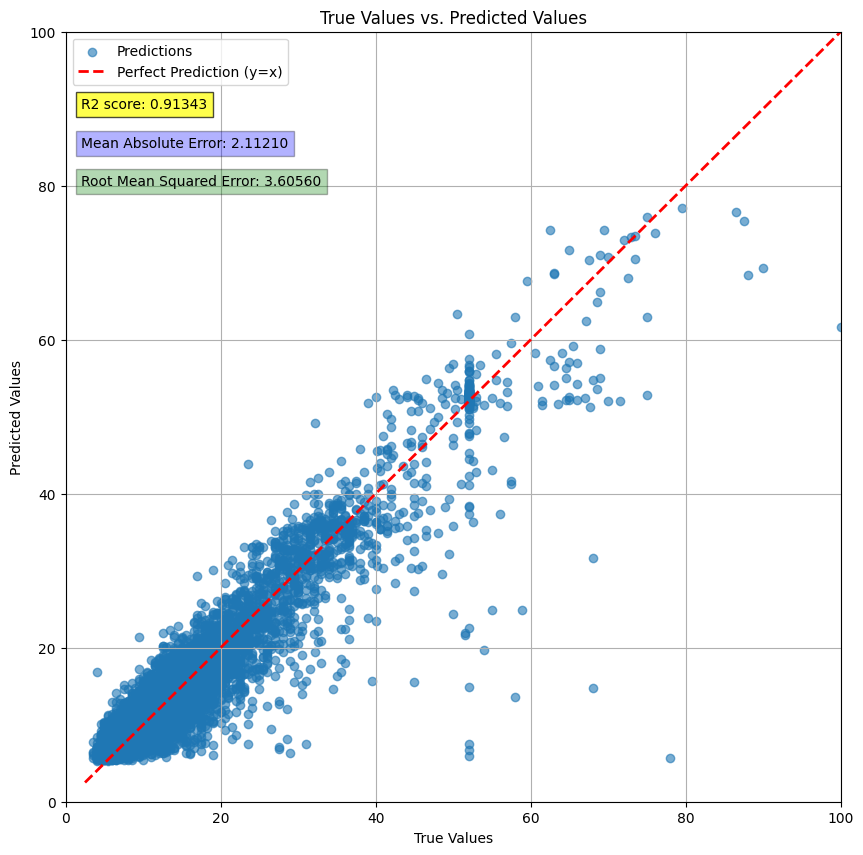

In [110]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_subsample_val[:10000], clf_pred_fa[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,100])
plt.ylim([0,100])
#plotting perfect line
min_val = min(np.min(y_subsample_val), np.min(clf_pred_fa))
max_val = max(np.max(y_subsample_val), np.max(clf_pred_fa))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.text(2,90,f'R2 score: {r2_fare_opt:.5f}',bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(2,85,f'Mean Absolute Error: {mae:.5f}',bbox=dict(facecolor='blue', alpha=0.3))
plt.text(2,80,f'Root Mean Squared Error: {rmse:.5f}',bbox=dict(facecolor='green', alpha=0.3))
plt.show()

Now we will optimize the travel time predictions with the random forest

In [97]:
y_train_tt = y_train_travel_time.reset_index(drop=True)
y_val_tt = y_val_travel_time.reset_index(drop=True)

# create a much smaller subsample from our X_train dataset
n_samples = 80000
rand_idx = np.random.choice(X_train.shape[0], size=n_samples, replace=False)

X_subsample_train_tt = X_train[rand_idx]
y_subsample_train_tt = y_train_tt[rand_idx]
print(X_subsample_train_tt.shape)
print(y_subsample_train_tt.shape)

# we also create one for our validation X_val dataset
n_samples = 20000
rand_idx = np.random.choice(X_val.shape[0], size=n_samples, replace=False)

X_subsample_val_tt = X_val[rand_idx]
y_subsample_val_tt = y_val_tt[rand_idx]
print(X_subsample_val_tt.shape)
print(y_subsample_val_tt.shape)

(80000, 12)
(80000,)
(20000, 12)
(20000,)


In [98]:
travel_time_rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# we will choose from the following parameters to perform our cross validation search
rf_params_tt = {'n_estimators':[int(x) for x in np.linspace(start=400,stop=1000,num=10)], # 100,200,300...1000
             'max_features':['sqrt','log2',0.5,0.75,1.0],
             'max_depth':[int(x) for x in np.linspace(start=50,stop=150,num=10)], # 10,20...50
             'min_samples_split':[5,10,15,25,50],
             'min_samples_leaf':[6,7,8,9,10],
             }

n_iterations_tt = 50

clf_travel_time = RandomizedSearchCV(estimator=travel_time_rf,
                                     param_distributions=rf_params_tt,
                                     n_iter=n_iterations_tt,
                                     cv=5,
                                     scoring='r2',
                                     verbose=3,
                                     n_jobs=-1,
                                     random_state=42)

In [99]:
clf_travel_time.fit(X_subsample_train_tt,y_subsample_train_tt)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=50, max_features=0.75, min_samples_leaf=8, min_samples_split=10, n_estimators=400;, score=0.759 total time=  38.0s
[CV 2/5] END max_depth=50, max_features=0.75, min_samples_leaf=8, min_samples_split=10, n_estimators=400;, score=0.761 total time=  38.0s
[CV 3/5] END max_depth=50, max_features=0.75, min_samples_leaf=8, min_samples_split=10, n_estimators=400;, score=0.782 total time=  38.0s
[CV 3/5] END max_depth=105, max_features=1.0, min_samples_leaf=6, min_samples_split=15, n_estimators=400;, score=0.780 total time=  49.9s
[CV 1/5] END max_depth=105, max_features=1.0, min_samples_leaf=6, min_samples_split=15, n_estimators=400;, score=0.758 total time=  50.1s
[CV 5/5] END max_depth=105, max_features=1.0, min_samples_leaf=6, min_samples_split=15, n_estimators=400;, score=0.771 total time=  50.3s
[CV 4/5] END max_depth=105, max_features=1.0, min_samples_leaf=6, min_samples_split=15, n_estimators=400;, sco

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/5] END max_depth=138, max_features=0.5, min_samples_leaf=7, min_samples_split=25, n_estimators=600;, score=0.760 total time=  57.0s
[CV 5/5] END max_depth=138, max_features=0.5, min_samples_leaf=7, min_samples_split=25, n_estimators=600;, score=0.773 total time=  55.8s
[CV 2/5] END max_depth=50, max_features=0.75, min_samples_leaf=6, min_samples_split=10, n_estimators=1000;, score=0.762 total time= 2.3min
[CV 3/5] END max_depth=50, max_features=0.75, min_samples_leaf=6, min_samples_split=10, n_estimators=1000;, score=0.783 total time= 2.3min
[CV 4/5] END max_depth=50, max_features=0.75, min_samples_leaf=6, min_samples_split=10, n_estimators=1000;, score=0.762 total time= 2.3min
[CV 5/5] END max_depth=50, max_features=0.75, min_samples_leaf=6, min_samples_split=10, n_estimators=1000;, score=0.774 total time= 2.3min
[CV 1/5] END max_depth=105, max_features=0.5, min_samples_leaf=9, min_samples_split=50, n_estimators=1000;, score=0.754 total time= 1.3min
[CV 2/5] END max_depth=105, m

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [50, 61, 72, 83, 94, 105,
                                                      116, 127, 138, 150],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         0.75, 1.0],
                                        'min_samples_leaf': [6, 7, 8, 9, 10],
                                        'min_samples_split': [5, 10, 15, 25,
                                                              50],
                                        'n_estimators': [400, 466, 533, 600,
                                                         666, 733, 800, 866,
                                                         933, 1000]},
                   random_state=42, scoring='r2', verbose=3)

In [100]:
clf_pred_tt = clf_travel_time.predict(X_subsample_val_tt)

In [101]:
# measure our results
r2_tt_opt = r2_score(y_subsample_val_tt, clf_pred_tt)
mae = mean_absolute_error(y_subsample_val_tt, clf_pred_tt)
rmse = root_mean_squared_error(y_subsample_val_tt, clf_pred_tt)
# agregar r2
print(f'R2 score: {r2_tt_opt}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.7645880227580534
Mean Absolute Error: 246.17792754412108
Root Mean Squared Error: 387.176264980704


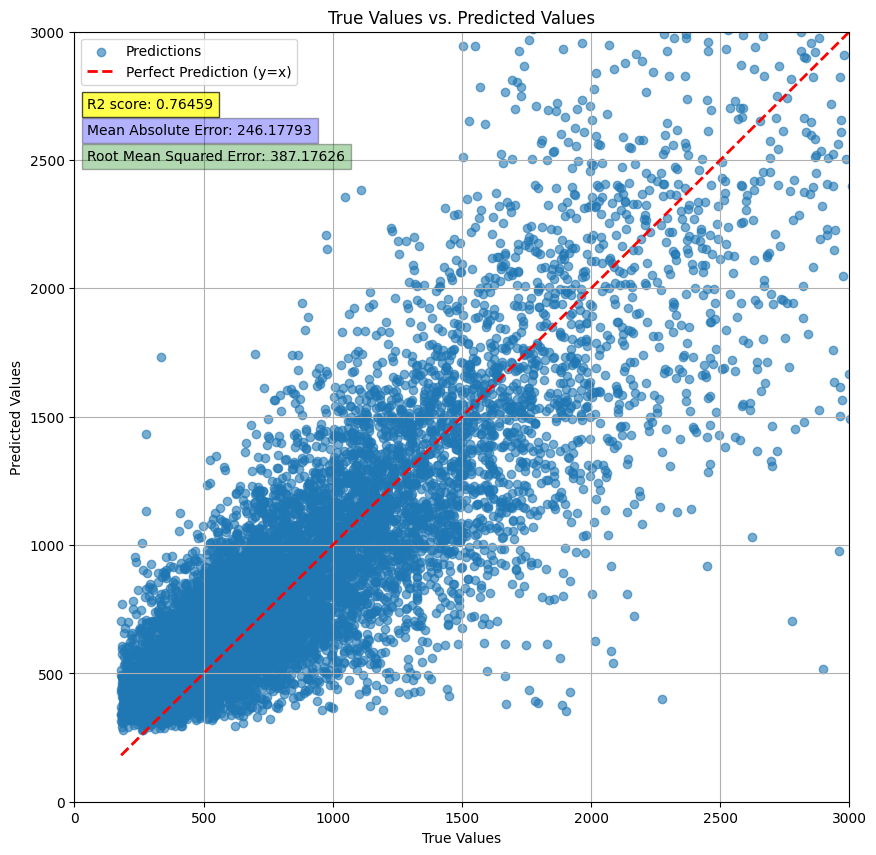

In [102]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_subsample_val_tt[:10000], clf_pred_tt[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,3000])
plt.ylim([0,3000])
#plotting perfect line
min_val = min(np.min(y_subsample_val_tt), np.min(clf_pred_tt))
max_val = max(np.max(y_subsample_val_tt), np.max(clf_pred_tt))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.text(50,2700,f'R2 score: {r2_tt_opt:.5f}',bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(50,2600,f'Mean Absolute Error: {mae:.5f}',bbox=dict(facecolor='blue', alpha=0.3))
plt.text(50,2500,f'Root Mean Squared Error: {rmse:.5f}',bbox=dict(facecolor='green', alpha=0.3))
plt.show()